<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Sarima Rossmann Lab

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## Load the data

In [20]:
df = pd.read_csv('../../../../resource-datasets/rossmann_stores/rossmann.csv')
# Set the DateTime index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [4]:
df.dtypes

Store             int64
DayOfWeek         int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

## Subset the data on `Store==1` and `Open==1`

The time series we want to predict is the `Sales` column.
Plot the time series.

In [ ]:
users[(users.age < 20) & (users.gender=='M')].head()


In [21]:
df_s1 = df[(df.Store==1) & (df.Open==1)]

In [24]:
df_s1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-30,1,4,5020,546,1,1,0,1
2015-07-29,1,3,4782,523,1,1,0,1
2015-07-28,1,2,5011,560,1,1,0,1
2015-07-27,1,1,6102,612,1,1,0,1


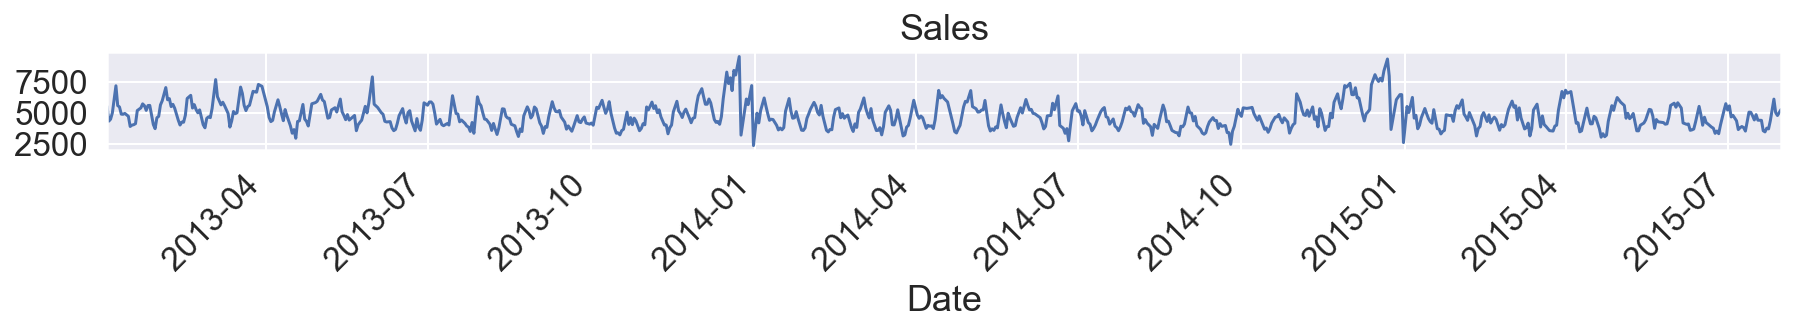

In [30]:
df_s1.Sales.plot(figsize=(15, 1), title='Sales')
plt.xticks(rotation=45)
plt.show()

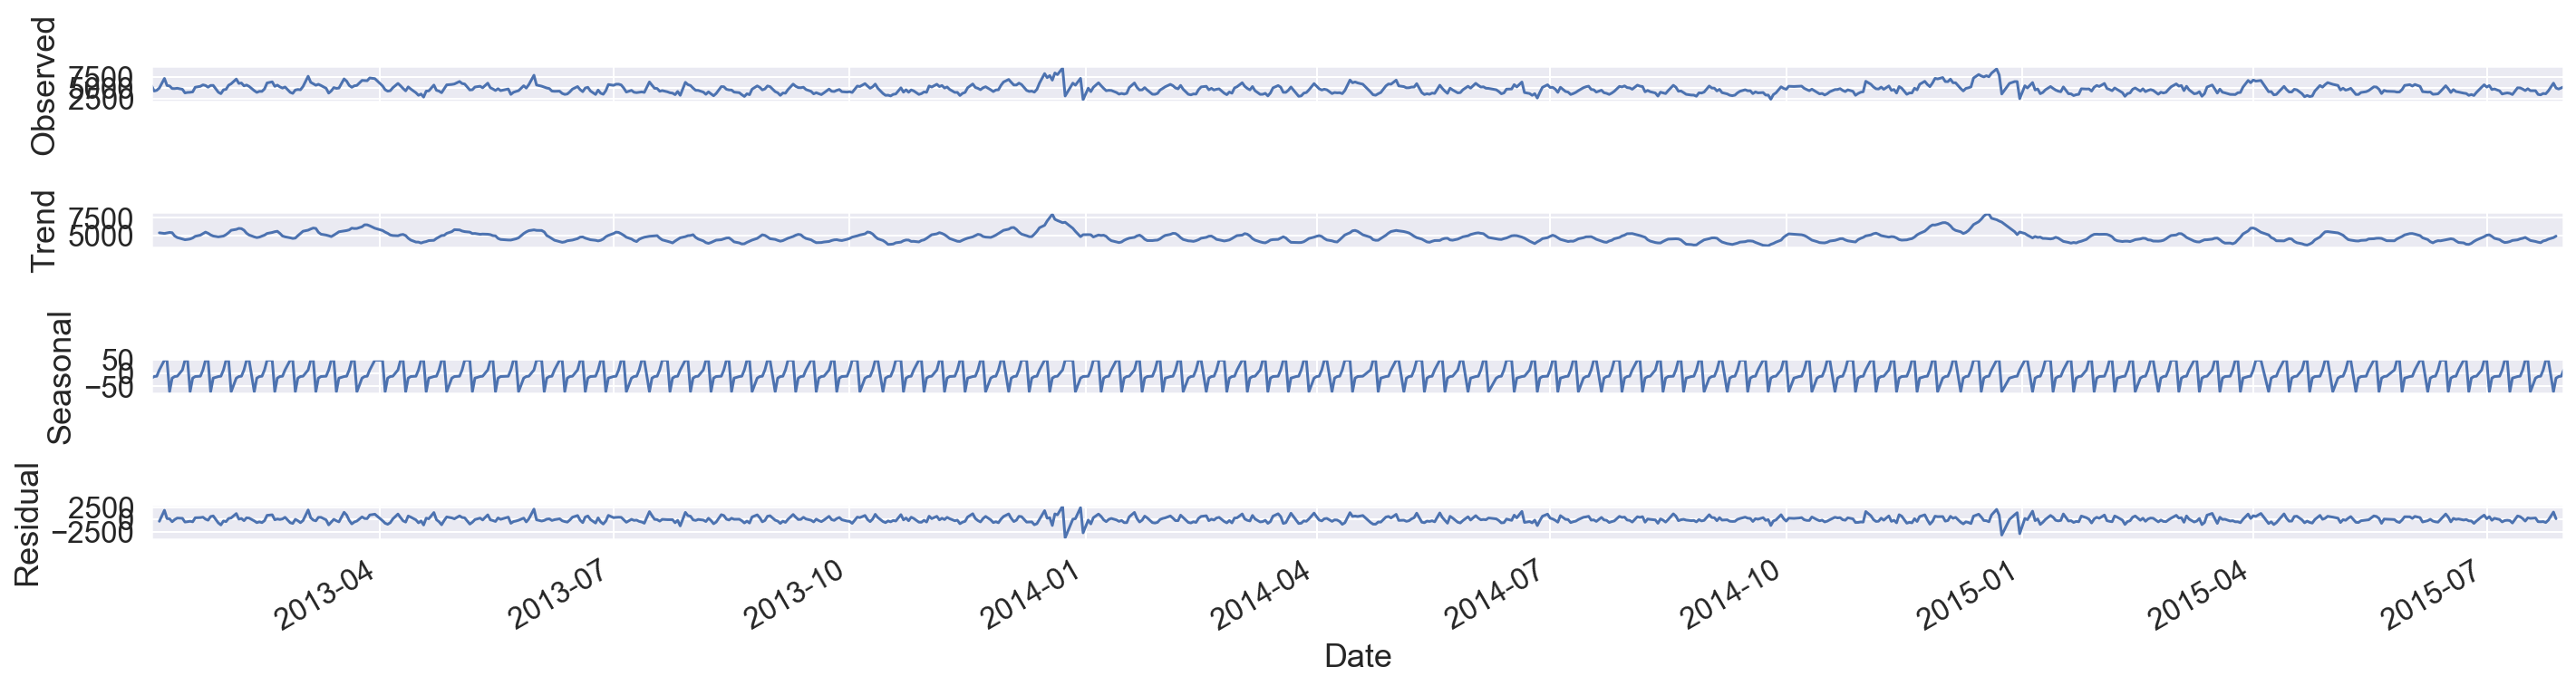

In [53]:
decomposition = seasonal_decompose(df_s1.Sales, freq=7)
fig = decomposition.plot()
fig.set_size_inches(24, 6)
plt.show()

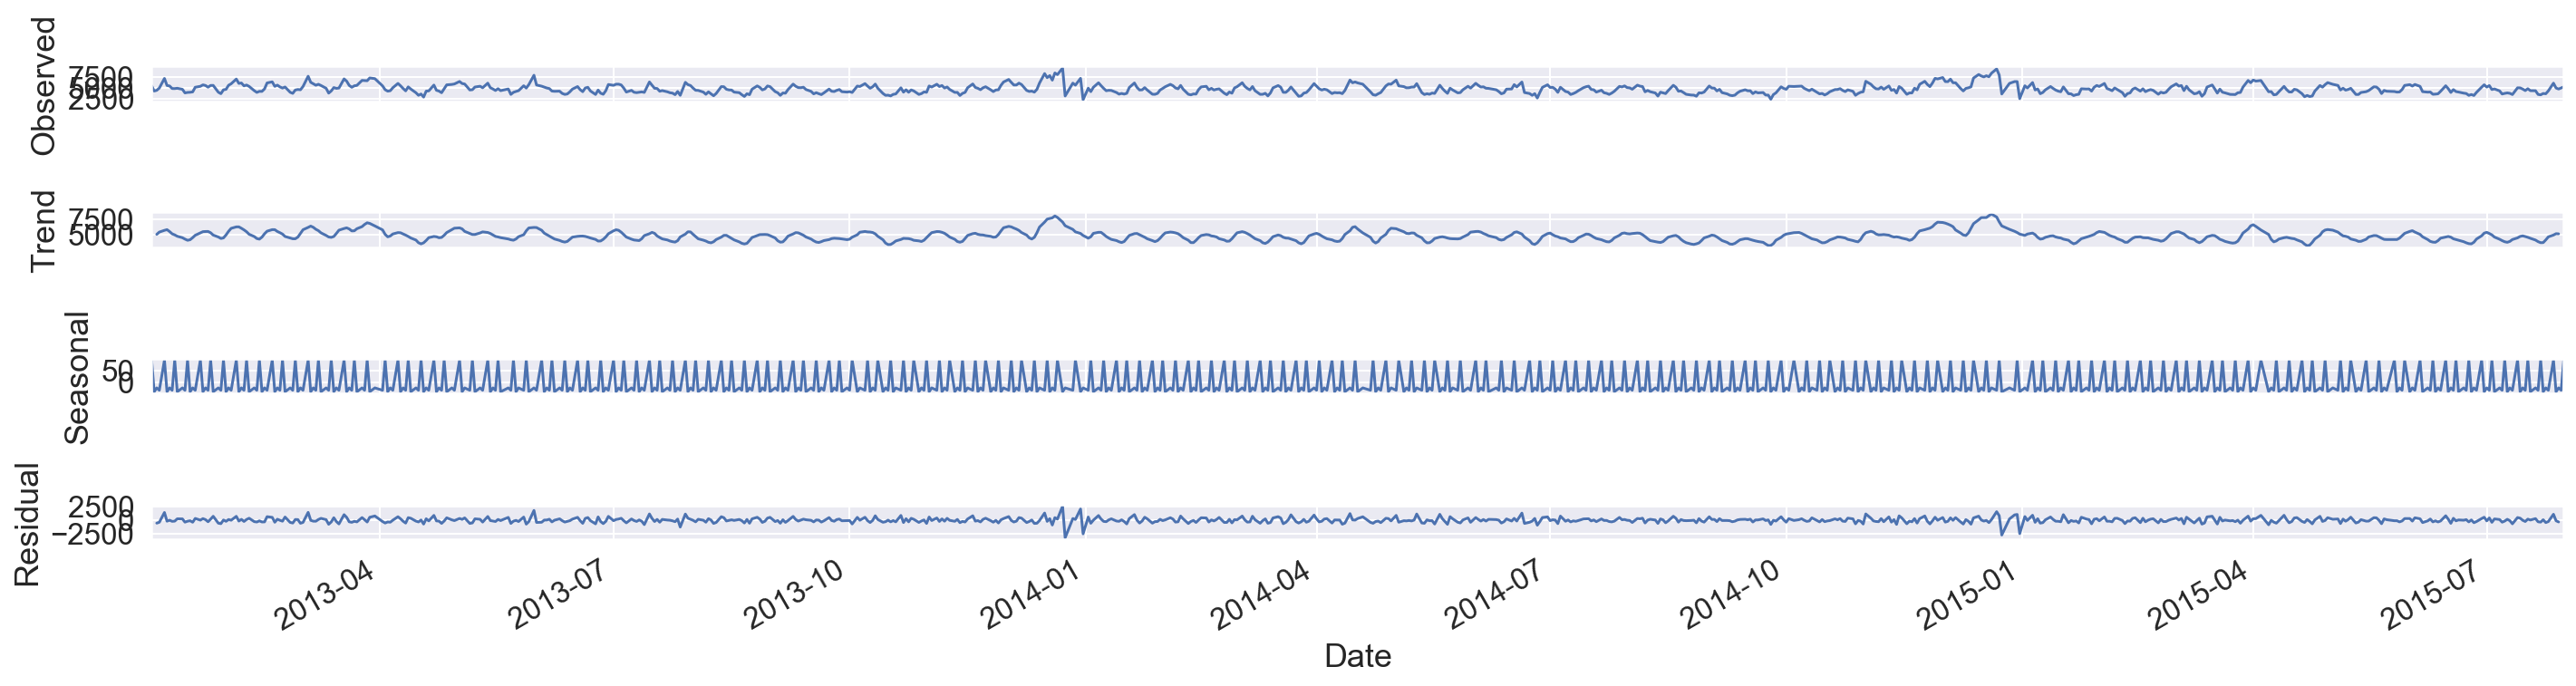

In [56]:
decomposition = seasonal_decompose(df_s1.Sales, freq=4)
fig = decomposition.plot()
fig.set_size_inches(24, 6)
plt.show()

## Decompose the time series

In [ ]:
df_stacked['seasonal_difference'] = df_stacked.data-df_stacked.data.shift(4)

In [76]:
df_s1["seasonal_diff_6"]=df_s1.Sales-df_s1.Sales.shift(6)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_s1.shape

(781, 11)

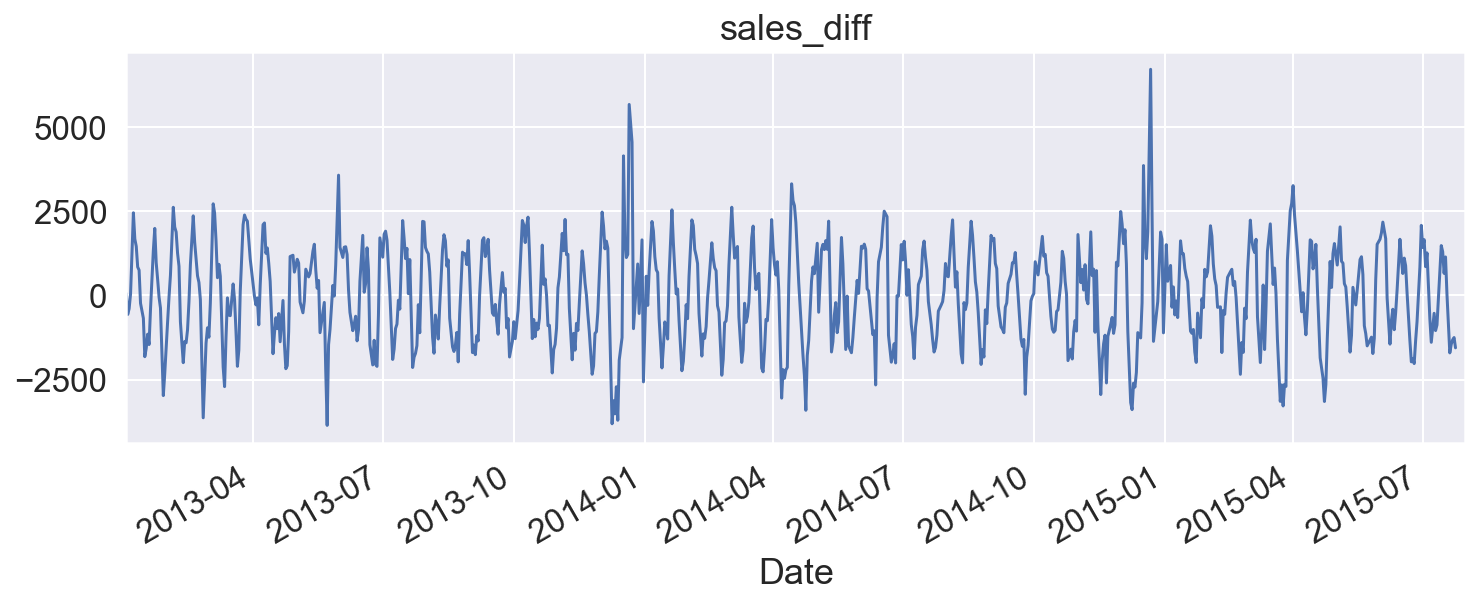

In [77]:
df_s1.seasonal_diff_6.plot(
    figsize=(12, 4), title='sales_diff')
plt.show()

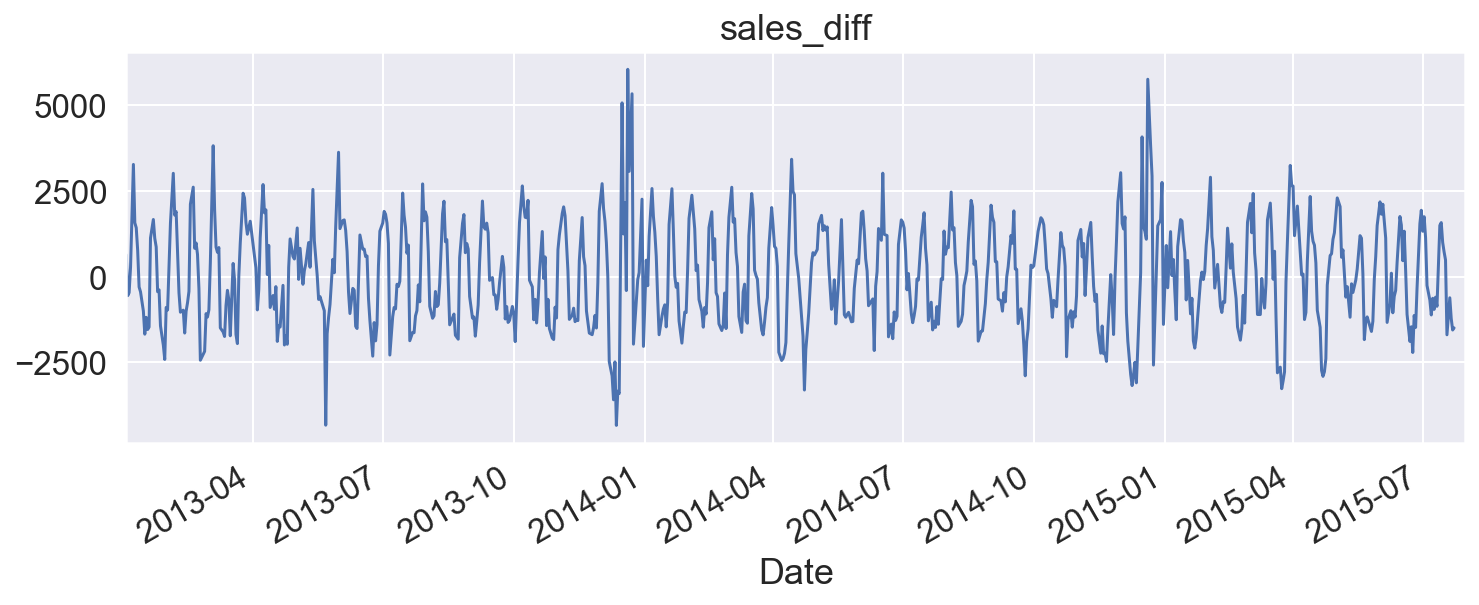

In [62]:
df_s1.seasonal_diff.plot(
    figsize=(12, 4), title='sales_diff')
plt.show()

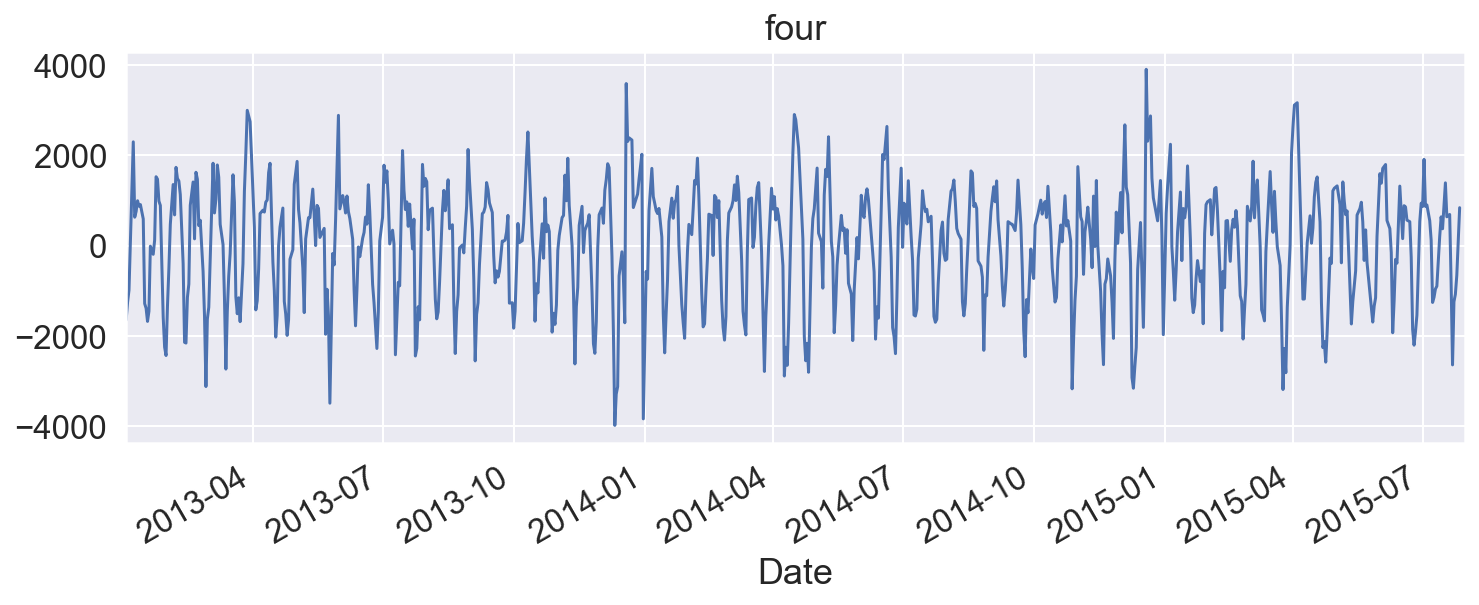

In [64]:
df_s1.seasonal_diff_try4.plot(
    figsize=(12, 4), title='four')
plt.show()

## Plot the (partial) autocorrelations

In [66]:
def autocorr_plots(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    return fig, ax

In [67]:
#fig, ax = autocorr_plots(df_stacked.data)
#fig, ax = autocorr_plots(df_stacked.seasonal_difference.dropna())

In [69]:
import seaborn as sns
from scipy import stats

In [80]:
df_s1.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,seasonal_diff,seasonal_diff_try4,seasonal_diff_365,seasonal_diff_6
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,NaN,NaN,NaN,NaN
2015-07-30,1,4,5020,546,1,1,0,1,NaN,NaN,NaN,NaN
2015-07-29,1,3,4782,523,1,1,0,1,NaN,NaN,NaN,NaN
2015-07-28,1,2,5011,560,1,1,0,1,NaN,NaN,NaN,NaN
2015-07-27,1,1,6102,612,1,1,0,1,NaN,839.0,NaN,NaN
2015-07-25,1,6,4364,500,1,0,0,0,NaN,-656.0,NaN,NaN
2015-07-24,1,5,3706,459,1,0,0,0,NaN,-1076.0,NaN,-1557.0
2015-07-23,1,4,3769,503,1,0,0,0,-1494.0,-1242.0,NaN,-1251.0
2015-07-22,1,3,3464,463,1,0,0,0,-1556.0,-2638.0,NaN,-1318.0


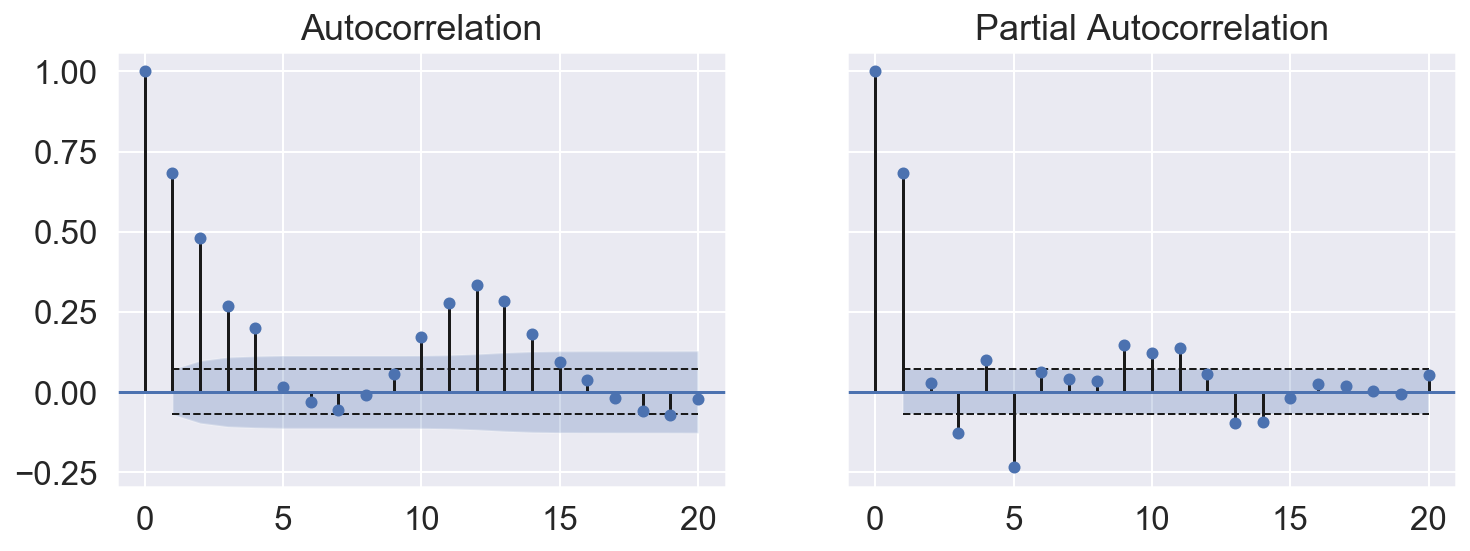

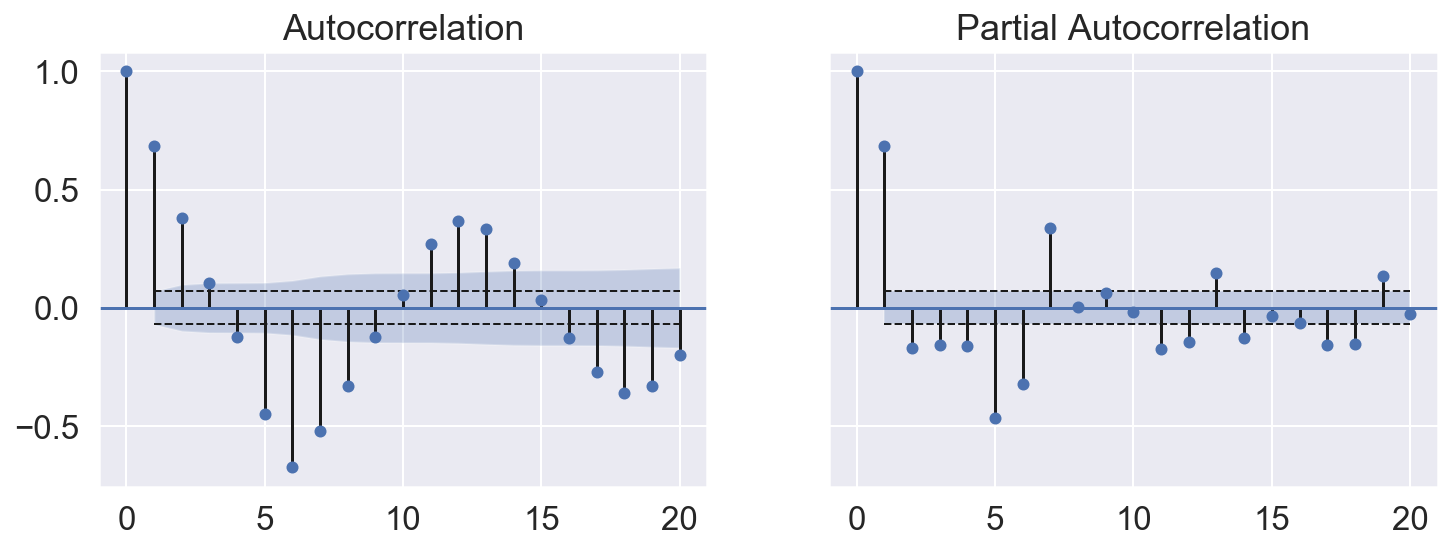

In [79]:
fig, ax = autocorr_plots(df_s1.Sales)
fig, ax = autocorr_plots(df_s1.seasonal_diff_6.dropna())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


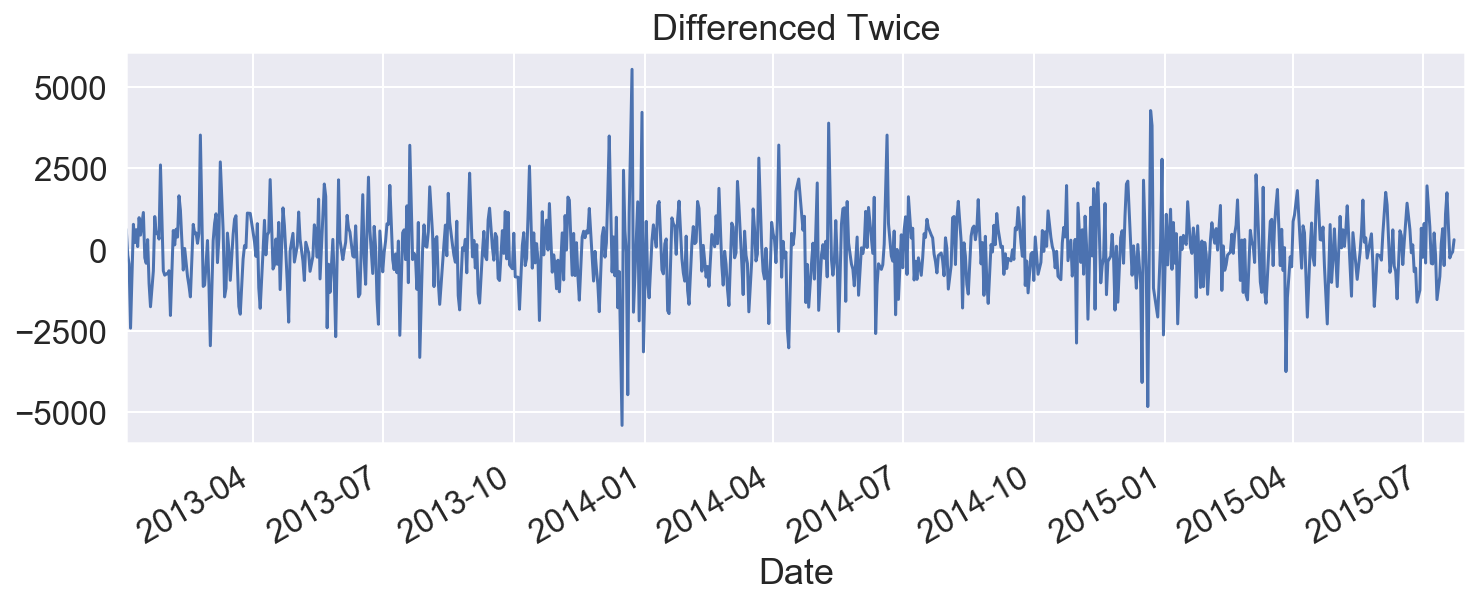

In [83]:
df_s1['seasonal_diff_6_2'] = df_s1.seasonal_diff_6.diff()
df_s1.seasonal_diff_6_2.plot(
    figsize=(12, 4), title='Differenced Twice')
plt.show()

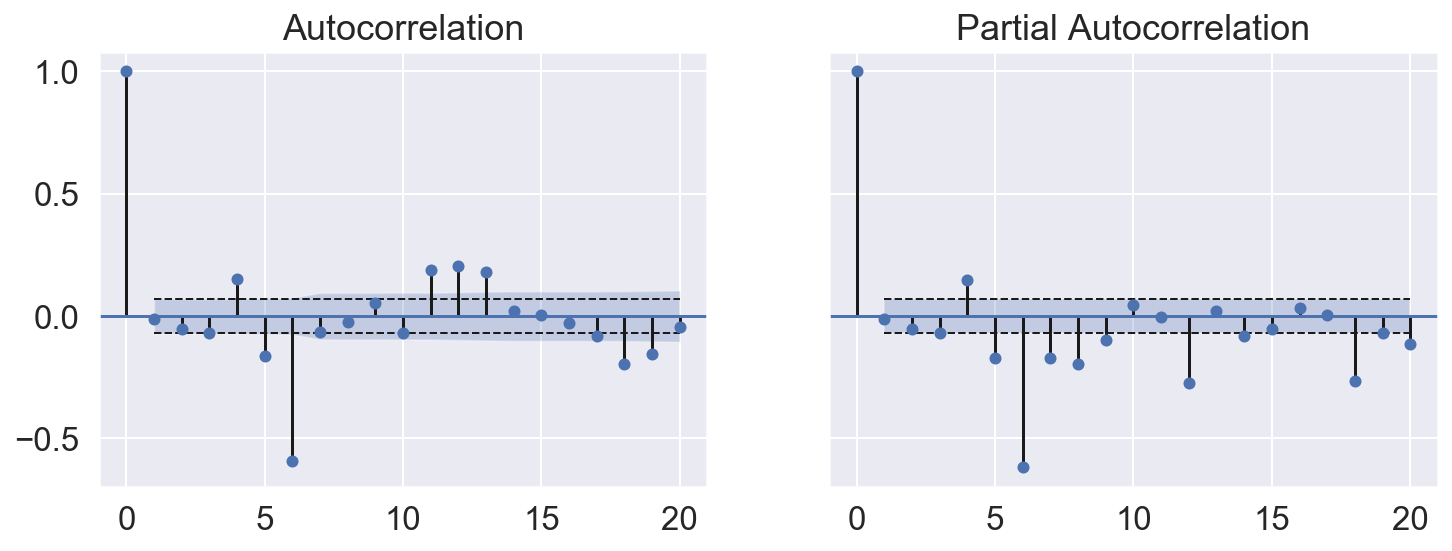

In [84]:
fig, ax = autocorr_plots(df_s1.seasonal_diff_6_2.dropna())

## Test for the effect of ordinary and seasonal differencing

In [85]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,maxlag=None,regression='c',autolag='AIC'):
    '''Perform Dickey-Fuller test and print out results'''
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,regression=regression,autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 


In [90]:
test_stationarity(df_s1.seasonal_diff_6_2[7:],maxlag=20,regression='c',autolag='AIC')

Results of Dickey-Fuller Test:
Test Statistic                -1.297455e+01
p-value                        3.031839e-24
#Lags Used                     2.000000e+01
Number of Observations Used    7.530000e+02
Critical Value (1%)           -3.439064e+00
Critical Value (5%)           -2.865386e+00
Critical Value (10%)          -2.568818e+00
dtype: float64


In [92]:
test_stationarity(df_s1.seasonal_diff_6[6:],maxlag=20,regression='c',autolag='AIC')

Results of Dickey-Fuller Test:
Test Statistic                -9.258695e+00
p-value                        1.426406e-15
#Lags Used                     1.800000e+01
Number of Observations Used    7.560000e+02
Critical Value (1%)           -3.439029e+00
Critical Value (5%)           -2.865371e+00
Critical Value (10%)          -2.568810e+00
dtype: float64


In [95]:
test_stationarity(df_s1.Sales,maxlag=30,regression='c',autolag='AIC')

Results of Dickey-Fuller Test:
Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


## Fit a SARIMA model

- Fit and tune the model
- Provide plot diagnostics
- Produce in- and out-of-sample forecasts and plot
- Evaluate your model

In [6]:
# model = sm.tsa.statespace.SARIMAX(...)


In [97]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [105]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 8) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 8)
SARIMAX: (0, 0, 1) x (0, 1, 0, 8)
SARIMAX: (0, 1, 0) x (0, 1, 1, 8)
SARIMAX: (0, 1, 0) x (1, 0, 0, 8)


In [106]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_s1.Sales,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 0, 0)x(0, 0, 0, 8)12 - AIC:15459.622108817863
ARIMA(0, 0, 0)x(0, 0, 1, 8)12 - AIC:14834.844900786671
ARIMA(0, 0, 0)x(0, 1, 0, 8)12 - AIC:13419.496732572725
ARIMA(0, 0, 0)x(0, 1, 1, 8)12 - AIC:12796.516746120564
ARIMA(0, 0, 0)x(1, 0, 0, 8)12 - AIC:13423.258221905753


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 8)12 - AIC:13028.091640364313
ARIMA(0, 0, 0)x(1, 1, 0, 8)12 - AIC:13061.12691879292


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 8)12 - AIC:12797.479776927112
ARIMA(0, 0, 1)x(0, 0, 0, 8)12 - AIC:14606.050029859116


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 8)12 - AIC:13897.687791748023
ARIMA(0, 0, 1)x(0, 1, 0, 8)12 - AIC:13085.654519135087


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 8)12 - AIC:12490.061122564326
ARIMA(0, 0, 1)x(1, 0, 0, 8)12 - AIC:13096.072486003548


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

ARIMA(0, 0, 1)x(1, 0, 1, 8)12 - AIC:12670.06094130301
ARIMA(0, 0, 1)x(1, 1, 0, 8)12 - AIC:12766.43657854326


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 8)12 - AIC:12489.888742790576
ARIMA(0, 1, 0)x(0, 0, 0, 8)12 - AIC:12639.99860626189
ARIMA(0, 1, 0)x(0, 0, 1, 8)12 - AIC:12512.226111378823
ARIMA(0, 1, 0)x(0, 1, 0, 8)12 - AIC:13061.529787332125


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 0)x(0, 1, 1, 8)12 - AIC:12406.40386113861
ARIMA(0, 1, 0)x(1, 0, 0, 8)12 - AIC:12527.452167895339
ARIMA(0, 1, 0)x(1, 0, 1, 8)12 - AIC:12514.186637247305
ARIMA(0, 1, 0)x(1, 1, 0, 8)12 - AIC:12718.618667185303


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 0)x(1, 1, 1, 8)12 - AIC:12405.992631021398
ARIMA(0, 1, 1)x(0, 0, 0, 8)12 - AIC:12598.169691714013
ARIMA(0, 1, 1)x(0, 0, 1, 8)12 - AIC:12465.349309732446
ARIMA(0, 1, 1)x(0, 1, 0, 8)12 - AIC:13041.926621081751


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 1)x(0, 1, 1, 8)12 - AIC:12366.494559641633
ARIMA(0, 1, 1)x(1, 0, 0, 8)12 - AIC:12497.03348092599
ARIMA(0, 1, 1)x(1, 0, 1, 8)12 - AIC:12467.348276922168


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 8)12 - AIC:12709.518522989345


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 8)12 - AIC:12361.349690642557
ARIMA(1, 0, 0)x(0, 0, 0, 8)12 - AIC:12651.998336531478
ARIMA(1, 0, 0)x(0, 0, 1, 8)12 - AIC:12524.717256192554
ARIMA(1, 0, 0)x(0, 1, 0, 8)12 - AIC:12943.86230194167


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 0)x(0, 1, 1, 8)12 - AIC:12299.140200235925
ARIMA(1, 0, 0)x(1, 0, 0, 8)12 - AIC:12524.744005869266


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 8)12 - AIC:12439.433612304914


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 8)12 - AIC:12584.495992377011
ARIMA(1, 0, 0)x(1, 1, 1, 8)12 - AIC:12299.722295439007
ARIMA(1, 0, 1)x(0, 0, 0, 8)12 - AIC:12612.260213025816
ARIMA(1, 0, 1)x(0, 0, 1, 8)12 - AIC:12481.363351726783
ARIMA(1, 0, 1)x(0, 1, 0, 8)12 - AIC:12925.565518333107


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 1)x(0, 1, 1, 8)12 - AIC:12283.479612196952
ARIMA(1, 0, 1)x(1, 0, 0, 8)12 - AIC:12496.774466099338


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 8)12 - AIC:12422.472987580324


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 8)12 - AIC:12585.298190230998


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 8)12 - AIC:12283.369937351637
ARIMA(1, 1, 0)x(0, 0, 0, 8)12 - AIC:12615.919025190893
ARIMA(1, 1, 0)x(0, 0, 1, 8)12 - AIC:12485.152166359288
ARIMA(1, 1, 0)x(0, 1, 0, 8)12 - AIC:13058.683002152493


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 1, 0)x(0, 1, 1, 8)12 - AIC:12383.401531036692
ARIMA(1, 1, 0)x(1, 0, 0, 8)12 - AIC:12485.285375045649
ARIMA(1, 1, 0)x(1, 0, 1, 8)12 - AIC:12487.152037968002


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 8)12 - AIC:12691.072469758725


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 8)12 - AIC:12379.329322988717


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 8)12 - AIC:12500.474002002324


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 8)12 - AIC:12379.93773538066
ARIMA(1, 1, 1)x(0, 1, 0, 8)12 - AIC:13039.269769838022


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 8)12 - AIC:12274.690708328508


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 8)12 - AIC:12389.362322329087


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 8)12 - AIC:12381.831954411362


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 8)12 - AIC:12573.637335652627


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 8)12 - AIC:12341.649403922429


In [ ]:
ARIMA(1, 0, 1)x(0, 1, 1, 6)12 - AIC:12345.114337392133

In [102]:
data = df_s1.Sales
model = sm.tsa.statespace.SARIMAX(data,
                                  order=(1, 0, 1),
                                  seasonal_order=(0, 1, 1, 6))
results = model.fit()
results.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  781
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 6)   Log Likelihood               -6238.712
Date:                           Mon, 19 Aug 2019   AIC                          12485.423
Time:                                   16:20:56   BIC                          12504.035
Sample:                                        0   HQIC                         12492.584
                                           - 781                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7019      0.032     21.728      0.000       0.639       0.765
ma.L1         -0.0270      0.041     -0.653      0.514      -0.108       0.054
ma.S.L6       -0.9999      0.031    -32.241      0.000      -1.061      -0.939
sigma2      5.508e+05   5.62e-08    9.8e+12      0.000    5.51e+05    5.51e+05
===================================================================================
Ljung-Box (Q):                      230.96   Jarque-Bera (JB):              1935.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             1.04
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.57e+27. Standard errors may be unstable.
"""

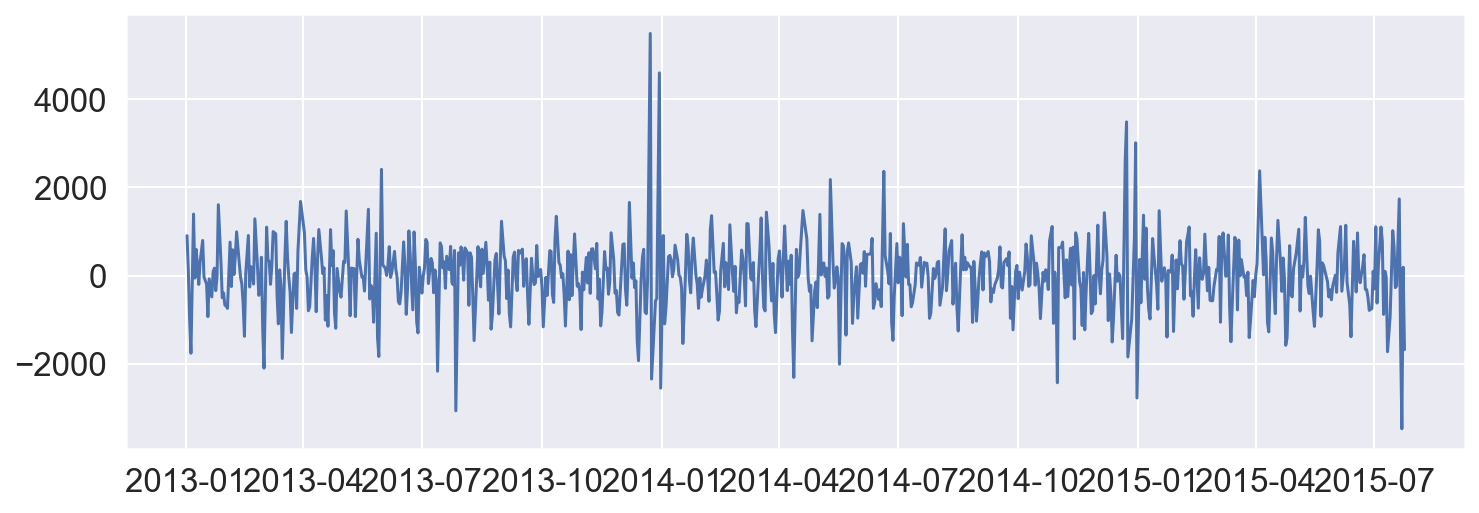

In [110]:
residuals = results.resid[6:]
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.show()

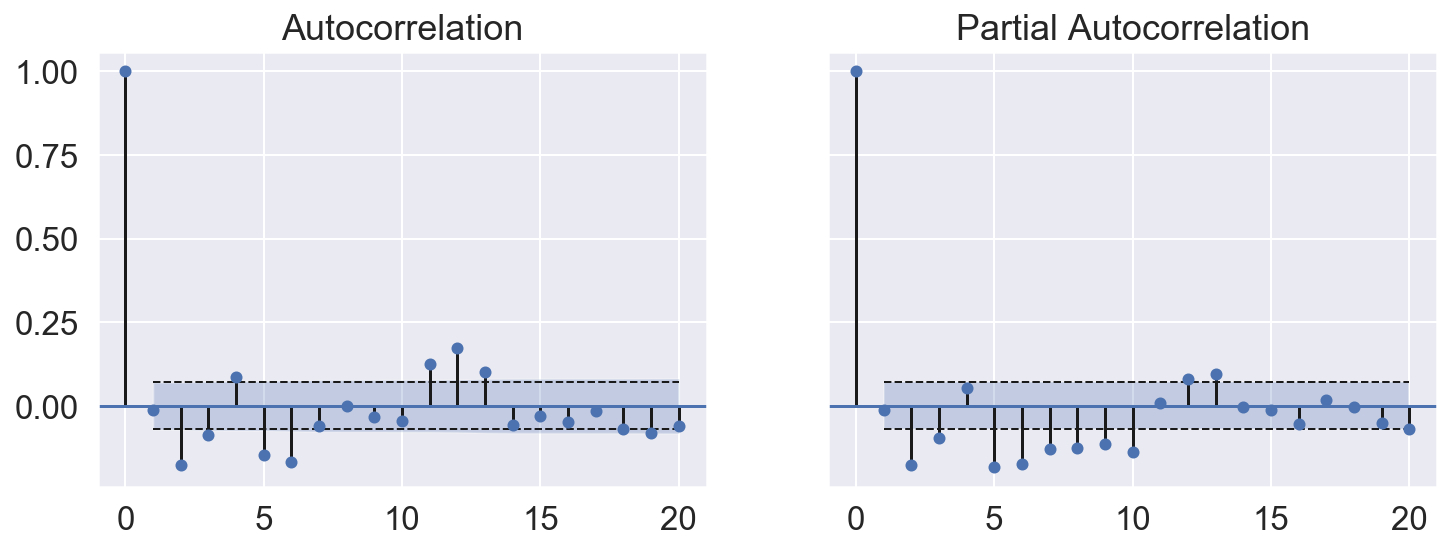

In [108]:
fig, ax = autocorr_plots(residuals)

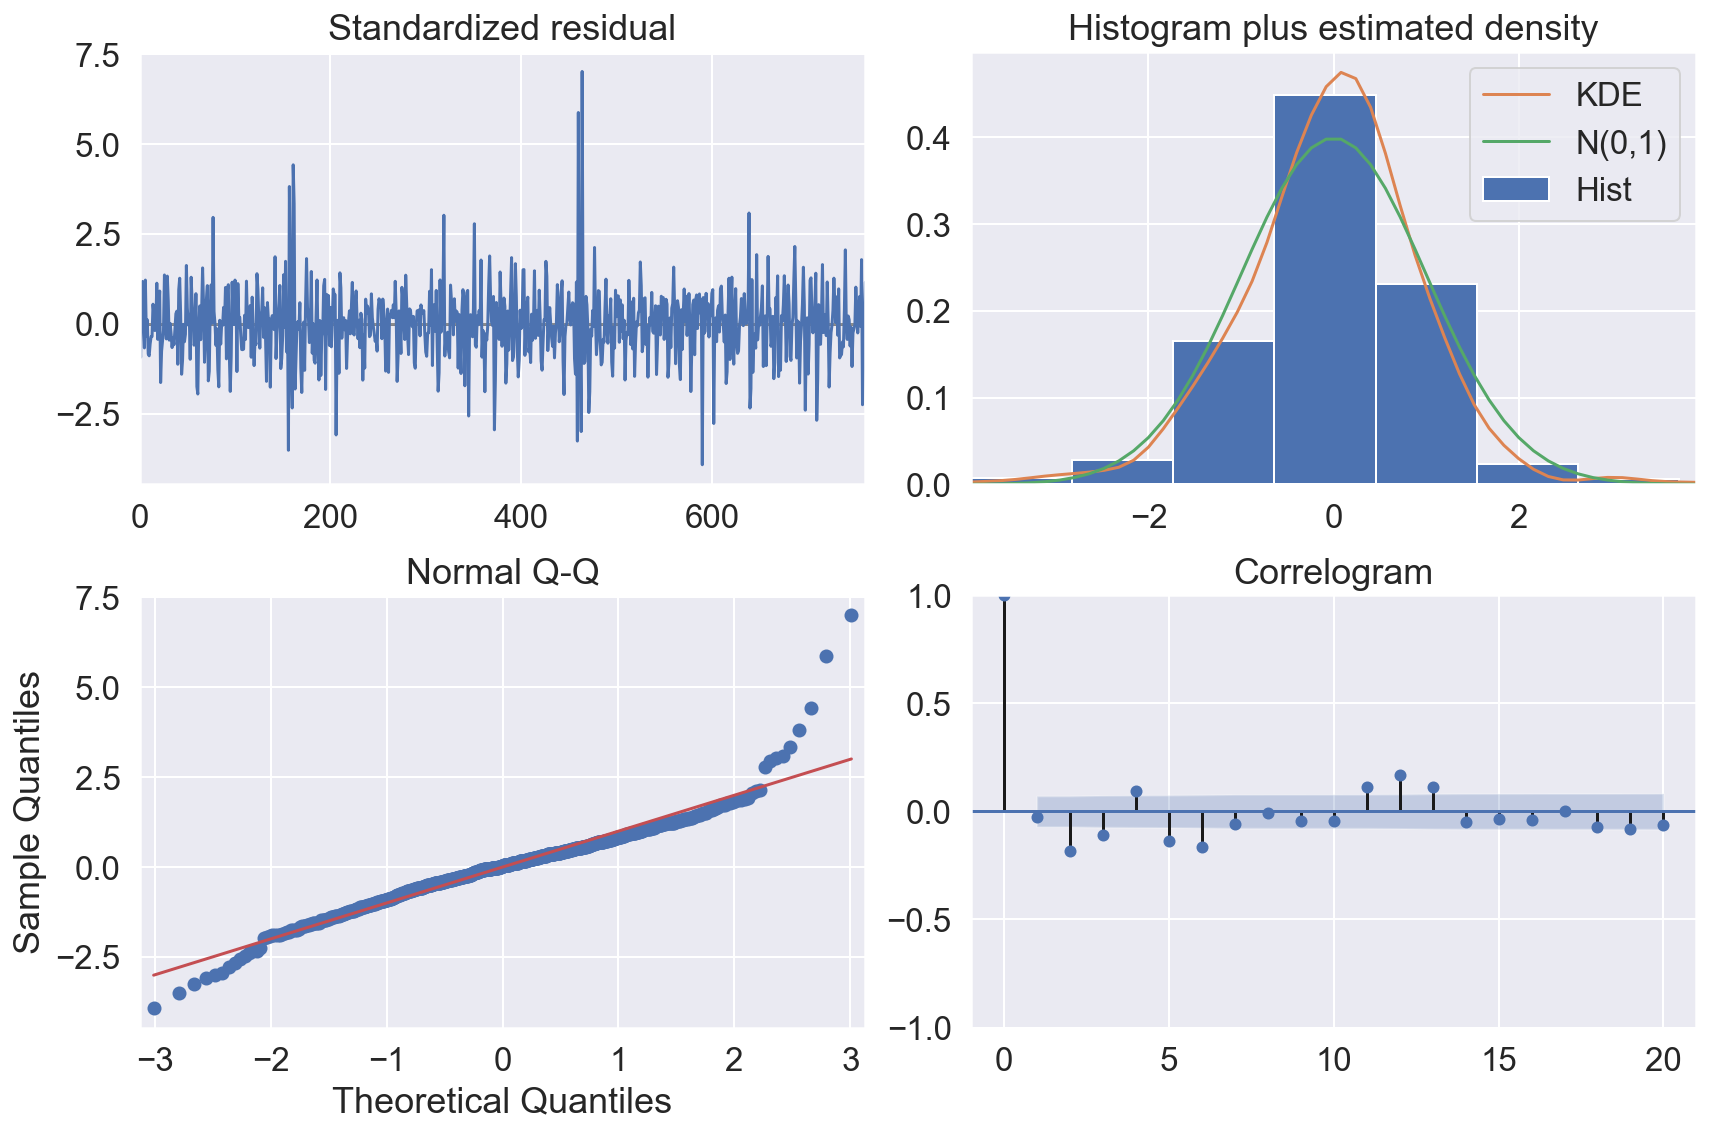

In [111]:
results.plot_diagnostics(figsize=(12, 8), lags=20)
plt.tight_layout()
plt.show()

In [132]:
preds = results.forecast(3)
fcast = np.concatenate([data.values, preds])

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [133]:
preds

781    4957.575591
782    5067.267698
783    4995.165011
dtype: float64

In [134]:
fcast

array([5263.        , 5020.        , 4782.        , 5011.        ,
       6102.        , 4364.        , 3706.        , 3769.        ,
       3464.        , 3558.        , 4395.        , 4406.        ,
       4852.        , 4427.        , 4767.        , 5042.        ,
       5054.        , 3530.        , 3808.        , 3897.        ,
       3797.        , 3650.        , 4359.        , 4797.        ,
       4665.        , 5558.        , 5223.        , 5735.        ,
       5197.        , 4019.        , 3317.        , 3533.        ,
       3346.        , 3762.        , 3846.        , 4097.        ,
       4202.        , 4645.        , 4000.        , 4852.        ,
       5518.        , 4256.        , 3695.        , 3627.        ,
       3591.        , 4102.        , 4071.        , 4183.        ,
       5384.        , 5809.        , 5450.        , 5774.        ,
       5592.        , 4656.        , 4111.        , 4083.        ,
       4211.        , 4276.        , 4459.        , 3755.     

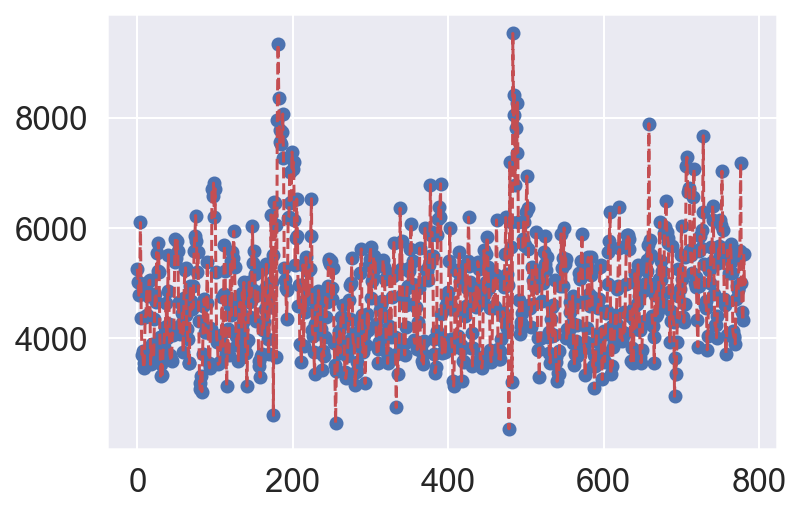

In [136]:
plt.figure()
plt.plot(data.values, 'o', fcast, 'r--')

plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error